## SimFrame Beams Module examples

The `beam` module in SimFrame is a container for arbitrary 6-dimensional particle distributions, providing functions for reading and writing to and from various file formats for simulation codes, including [ASTRA](https://www.desy.de/~mpyflo/Astra_manual/Astra-Manual_V3.2.pdf), [GPT](https://pulsar.nl/) (via [easyGDF](https://github.com/electronsandstuff/easygdf), [SDDS](https://ops.aps.anl.gov/manuals/SDDStoolkit/SDDStoolkit.html) (via [soliday.sdds](https://pypi.org/project/soliday.sdds/), [Ocelot](https://github.com/ocelot-collab/ocelot), [OpenPMD](https://github.com/ChristopherMayes/openPMD-beamphysics) and an in-house HDF5 distribution.

Functions and properties are provided for obtaining:
* slice properties
* Twiss parameters
* beam centroids
* beam sigmas
* beam emittances
* kernel density estimator
* minimum volume ellipse

This notebook will show some of the functionality for loading in distributions, writing them to files, and plotting beam distributions and analysis.

First import the SimFrame `Beams` module and the plotting functions.

The test file is loaded from the repository.

In [4]:
import sys

import SimulationFramework.Modules.Beams as rbf  # noqa E402
from SimulationFramework.Modules.Beams.plot import (
    plotScreenImage,
    density_plot,
    marginal_plot,
    slice_plot,
)

In [5]:
testbeamlocation = '../../tests/CLARA/Basefiles/Base_250pC/CLA-S02-SIM-APER-01.hdf5'
beam = rbf.beam(testbeamlocation)

In addition to the 6D phase space distribution [`x` (m), `y` (m), `z` (m) / `t` (s), `px` (kg*m/s), `py` (kg*m/s), `pz` (kg*m/s)] , the following properties are derived:
- `fullbeam` -- the transpose of the 6D array.
- [`xp`, `yp`] -- horizontal and vertical angular distributions.
- [`xc`, `xpc`, `yc`, `ypc`] -- horizontal and vertical positions and angular distributions, corrected for dispersion.
- [`cpx`, `cpy`, `cpz`] -- the beam momenta in eV/c.
- `deltap` -- fractional momentum deviation from the mean.
- [`p`, `cp`] -- total beam momentum in kg*m/s and eV/c, respectively.
- [`Ex`, `Ey`, `Ez`] -- beam energies in eV.
- [`Bx`, `By`, `Bz`] -- relativistic betas.
- `gamma` -- relativistic Lorentz factor.
- `Brho` -- magnetic rigidity.
- `BetaGamma` -- beam momentum as beta*gamma.
- [`kinetic_energy`, `mean_energy`] -- kinetic energy in J and its mean.
- `E0_eV` -- rest energy of the particles in eV.
- `Q` -- total charge of the bunch in C.

Note that only the base-level 6D distribution can be modified (along with attributes such as `toffset` and `total_charge`); all of the properties above are derived and cannot be set.

### Plotting beam parameters

Any of the array-like properties of the `beam` object can be plotted using the three functions defined below.

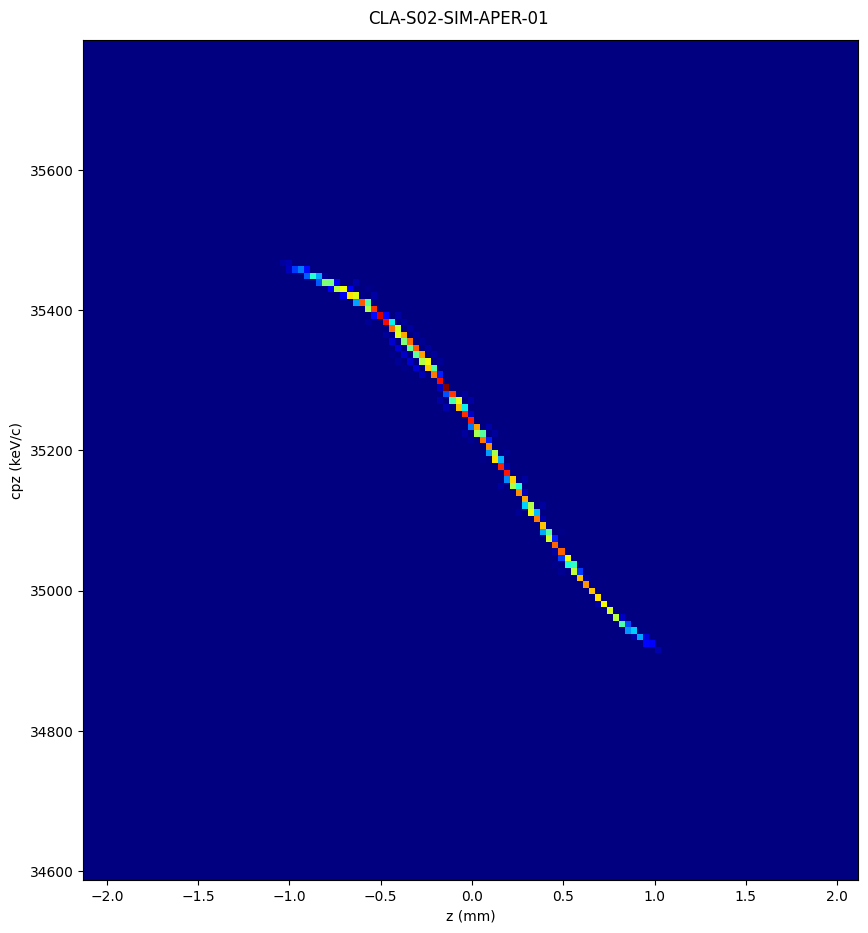

In [3]:
plotScreenImage(beam, keys=["z", "cpz"], subtract_mean=[True, False])

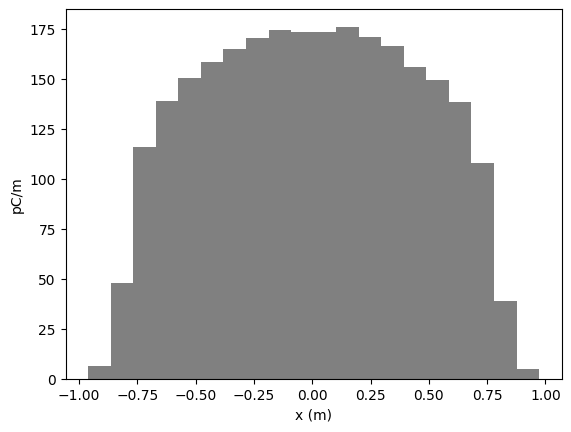

In [5]:
density_plot(beam, key="x", bins=20)

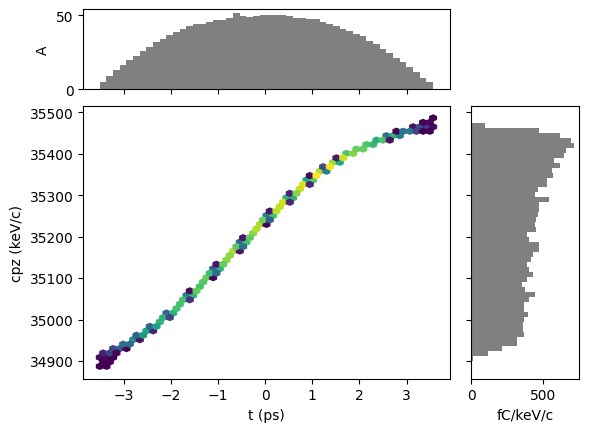

In [6]:
marginal_plot(beam, key1="t", key2="cpz", bins=50, subtract_mean=[True, False])

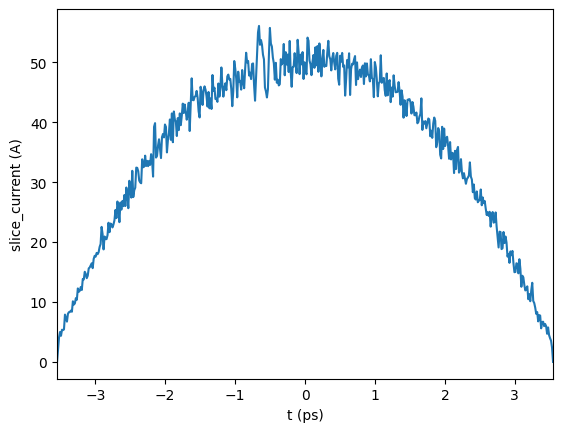

In [8]:
slice_plot(beam, bins=500)

### Derived objects from the distribution

Once a distribution is loaded, the `beam` object will calculate the emittance, Twiss, and so on, with the following properties defined therein.

In [14]:
beam.Particles.model_dump()

{'Q': -249.99904632567237 pC,
 'x': array([ 5.51101429e-07, -6.50362433e-05, -2.54837562e-04, ...,
         4.33454182e-04,  4.25720265e-04, -5.71904628e-04], units='m'),
 'y': array([-1.49411997e-06,  2.54326650e-04, -6.59195007e-05, ...,
        -3.35637164e-04, -1.45399671e-04, -1.67661723e-04], units='m'),
 'z': array([3.37146439, 3.37146054, 3.3714605 , ..., 3.37226684, 3.37182739,
        3.37151151], units='m'),
 'cpx': array([    4.00533305,  -227.35835643,  -884.67755086, ...,
         1967.51902427,  1013.42351584, -1785.75700152], units='eV/c'),
 'cpy': array([  -13.10264798,   880.77217307,  -231.4252551 , ...,
        -2019.46124709,  -650.02971922,  -606.29400726], units='eV/c'),
 'cpz': array([35239721.98261   , 35241031.27186141, 35241046.23069784, ...,
        34961040.3273581 , 35103161.1710736 , 35223046.05993564], units='eV/c'),
 'emittance': {'ex': 6.085569542900601 nm*rad,
  'ey': 6.096951369790895 nm*rad,
  'enx': 419.5296118918665 nm*rad,
  'eny': 420.3142571718

In [18]:
beam.Particles.emittance.model_dump()

{'ex': 6.085569542900601 nm*rad,
 'ey': 6.096951369790895 nm*rad,
 'enx': 419.5296118918665 nm*rad,
 'eny': 420.31425717185937 nm*rad,
 'ecx': 6.085564599083844 nm*rad,
 'ecy': 6.096937375117689 nm*rad,
 'ecnx': 419.529272031375 nm*rad,
 'ecny': 420.3132933613225 nm*rad,
 'normalized_horizontal_emittance': 419.5296128503428 nm*rad,
 'normalized_vertical_emittance': 420.3142581321283 nm*rad,
 'horizontal_emittance': 6.085569542900601 nm*rad,
 'vertical_emittance': 6.096951369790895 nm*rad,
 'horizontal_emittance_90': 26.77955808473015 nm*rad,
 'normalized_horizontal_emittance_90': 1.8459464492811317 µm*rad,
 'vertical_emittance_90': 26.76232912109781 nm*rad,
 'normalized_vertical_emittance_90': 1.84475883654528 µm*rad,
 'horizontal_emittance_corrected': 6.085564599083844 nm*rad,
 'vertical_emittance_corrected': 6.096937375117689 nm*rad,
 'normalised_horizontal_emittance_corrected': 419.529272031375 nm*rad,
 'normalised_vertical_emittance_corrected': 420.3132933613225 nm*rad}

In [12]:
beam.Particles.twiss.model_dump()

{'normalized_horizontal_emittance': 419.5296128503428 nm*rad,
 'normalized_vertical_emittance': 420.3142581321283 nm*rad,
 'horizontal_emittance': 6.085569542900601 nm*rad,
 'vertical_emittance': 6.096951369790895 nm*rad,
 'horizontal_emittance_corrected': 6.085564599083844 nm*rad,
 'vertical_emittance_corrected': 6.096937375117689 nm*rad,
 'beta_x': 32.05020978021645 m/rad,
 'alpha_x': -3.3212154062213517 m^-1/rad,
 'gamma_x': 0.3753632770899389 rad/m,
 'beta_y': 31.976841557655998 m/rad,
 'alpha_y': -3.3160807576647953 m^-1/rad,
 'gamma_y': 0.375158740106479 rad/m,
 'beta_x_corrected': 32.050219635126446 m/rad,
 'alpha_x_corrected': -3.3212156754949214 m^-1/rad,
 'gamma_x_corrected': 0.37536321747910933 rad/m,
 'beta_y_corrected': 31.97687646175686 m/rad,
 'alpha_y_corrected': -3.316082358099601 m^-1/rad,
 'gamma_y_corrected': 0.375158662543124 rad/m,
 'eta_x': 70.85083726242118 µm,
 'eta_xp': 10.634193345543734 µrad}

In [13]:
beam.Particles.sigmas.model_dump()

{'sigma_x': 441.6376121686877 µm,
 'sigma_y': 441.5441630647349 µm,
 'sigma_t': 1.6386590592345411 ps,
 'sigma_z': 491.2058865500386 µm,
 'sigma_cp': 156.01265890540358 keV/c,
 'sigma_cp_eV': 156.01265890540358 keV/c,
 'Sx': 441.6376121686877 µm,
 'Sy': 441.5441630647349 µm,
 'Sz': 491.2058865500386 µm,
 'St': 1.6386590592345411 ps,
 'momentum_spread': 156.01265890540358 keV/c,
 'linear_chirp_t_pz': -5.118464776079278 Gs/m/kg,
 'linear_chirp_z': -31.484941869066564 p}

In [14]:
beam.Particles.centroids.model_dump()

{'mean_x': 82.91555735978675 nm,
 'mean_y': -558.26953533303 nm,
 'mean_t': -18.70884225084076 fs,
 'mean_z': 3.3714699999998476 m,
 'mean_cpx': -1.6822938497155069 eV/c,
 'mean_cpy': -4.6192358672362035 eV/c,
 'mean_cpz': 35.22375881604315 MeV/c,
 'mean_energy': 2.8838063994312573 µeV*J/c,
 'mean_gamma': 68.93843003511505 ,
 'mean_cp': 35.22375889651695 MeV/c,
 'Cx': 82.91555735978675 nm,
 'Cy': -558.26953533303 nm,
 'Cz': 3.3714699999998476 m,
 'Ct': -18.70884225084076 fs,
 'Cp': 35.22375889651695 MeV/c,
 'Cpx': -1.6822938497155069 eV/c,
 'Cpy': -4.6192358672362035 eV/c,
 'Cpz': 35.22375881604315 MeV/c,
 'Cxp': -47.96882077938042 nrad,
 'Cyp': -130.8047034777232 nrad,
 'Cgamma': 68.93843003511505 ,
 'Ccp': 35.22375889651695 MeV/c,
 'CEn': 2.8838063994312573 µeV*J/c}

### Reading and writing to and from different simulation code formats

The `beam` object can load in and write to different file formats. The examples below show how to do this, and as a sanity check we can plot the beam distribution to check that it is the same after transforming.

In [4]:
astrabeamlocation = testbeamlocation.replace('hdf5', 'astra')
sddsbeamlocation = testbeamlocation.replace('hdf5', 'sdds')
ocelotbeamlocation = testbeamlocation.replace('hdf5', 'ocelot.npz')
gptbeamlocation = testbeamlocation.replace('hdf5', 'gdf')
beam.write_astra_beam_file(filename=astrabeamlocation)
beam.write_gdf_beam_file(filename=gptbeamlocation)
beam.write_ocelot_beam_file(filename=ocelotbeamlocation)
beam.write_SDDS_beam_file(filename=sddsbeamlocation)

initializing ocelot...


In [5]:
astrabeam = rbf.beam(astrabeamlocation)
sddsbeam = rbf.beam(sddsbeamlocation)
ocelotbeam = rbf.beam(ocelotbeamlocation)
gptbeam = rbf.beam(gptbeamlocation)

[ 5.51101429e-07 -6.50362433e-05 -2.54837562e-04 ...  4.33454182e-04
  4.25720265e-04 -5.71904628e-04]


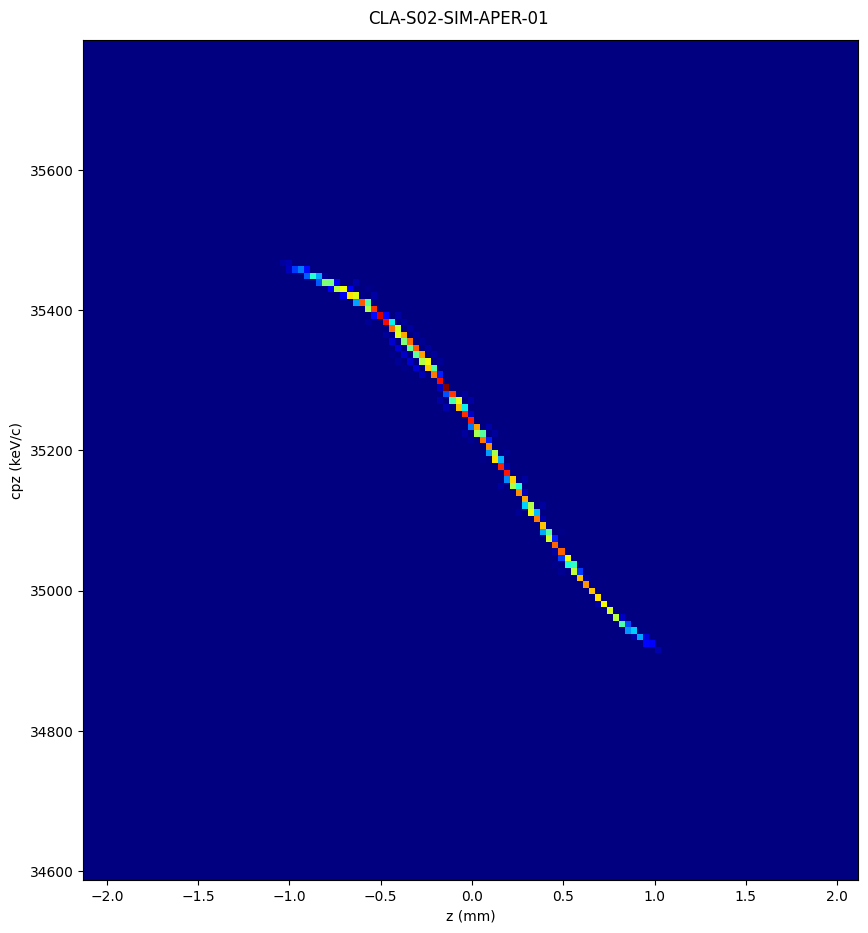

In [11]:
plotScreenImage(sddsbeam, keys=["z", "cpz"], subtract_mean=[True, False])